## import data and preprocessing

In [354]:
import os
import numpy as np
from skimage import io
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd


EPOCHS = 50
# folder and label paths
dir_train = 'augmented/train'
path_train = 'augmented/train_class_labels.txt'

dir_test = 'test'
path_test = 'test_class_labels.txt'

dir_train_original = 'train'
path_train_original = 'train_class_labels.txt'


# Load label files using pandas
df_train = pd.read_csv(path_train, sep='\t', header=None, names=['filename', 'label'])
df_test = pd.read_csv(path_test, sep='\t', header=None, names=['filename', 'label'])
df_train_original = pd.read_csv(path_train_original, sep='\t', header=None, names=['filename', 'label'])

# Function to load images and labels
def images_to_tensor(folder_path, label_df):
    images = []  # List to store image data
    labels = []  # List to store corresponding labels

    for _, row in tqdm(label_df.iterrows(), total=len(label_df)):
        filename = row['filename']
        label = row['label']
        image_path = os.path.join(folder_path, filename)

        if os.path.isfile(image_path):
            img = io.imread(image_path)  # Read RGB image
            images.append(img)
            labels.append(label)
        else:
            print("Missing file:", filename)

    return np.array(images), np.array(labels)

# Load training images from augmented folder
x_train, y_train = images_to_tensor(dir_train, df_train)

## Load training images from original folder
x_train_original, y_train_original = images_to_tensor(dir_train_original, df_train_original)

# Load test folder
x_test, y_test = images_to_tensor(dir_test, df_test)

100%|██████████| 2000/2000 [00:00<00:00, 3578.71it/s]


In [355]:

print('train shape: ' + str(x_train.shape))
print('test shape: ' + str(x_test.shape))
print('original train shape' + str(x_train_original.shape))

print('label train shape: ' + str(y_train.shape))
print('label test shape: ' + str(y_test.shape))
print('label original train shape' + str(y_train_original.shape))

train shape: (30000, 32, 32, 3)
test shape: (2000, 32, 32, 3)
original train shape(10000, 32, 32, 3)
label train shape: (30000,)
label test shape: (2000,)
label original train shape(10000,)


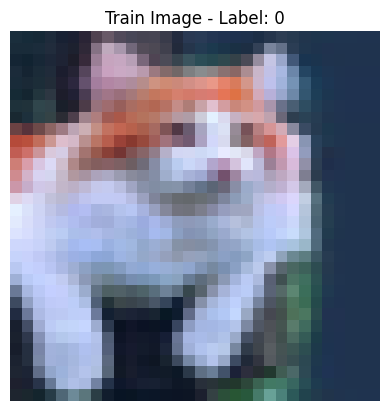

'the label is correct as i have shown'

In [356]:
test = 2703
plt.imshow(x_train[test])
plt.title("Train Image - Label: " + str(y_train[test]))
plt.axis('off')
plt.show()
'''the label is correct as i have shown'''

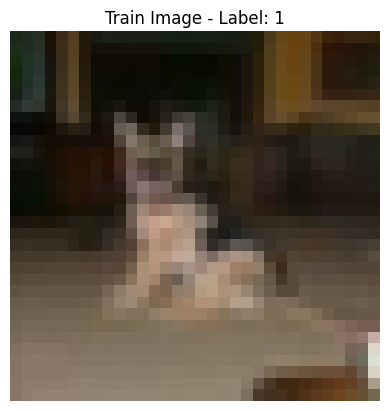

'the label is correct as i have shown'

In [357]:
test = 27000
plt.imshow(x_train[test])
plt.title("Train Image - Label: " + str(y_train[test]))
plt.axis('off')
plt.show()
'''the label is correct as i have shown'''

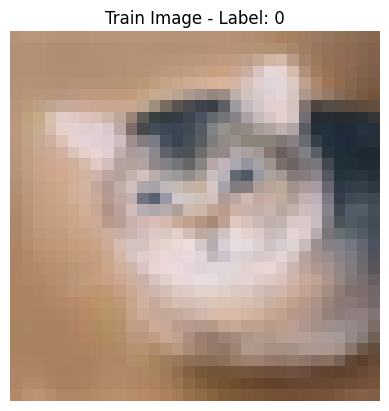

'the label is correct as i have shown'

In [358]:
test = 29
plt.imshow(x_test[test])
plt.title("Train Image - Label: " + str(y_test[test]))
plt.axis('off')
plt.show()
'''the label is correct as i have shown'''

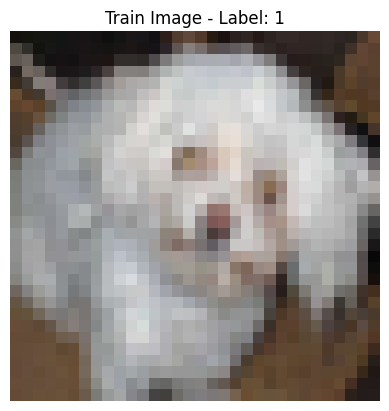

'the label is correct as i have shown'

In [359]:
test = 1000
plt.imshow(x_test[test])
plt.title("Train Image - Label: " + str(y_test[test]))
plt.axis('off')
plt.show()
'''the label is correct as i have shown'''

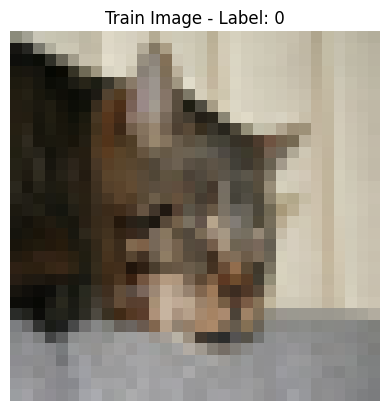

'the label is correct as i have shown'

In [360]:
test = 200
plt.imshow(x_train_original[test])
plt.title("Train Image - Label: " + str(y_train_original[test]))
plt.axis('off')
plt.show()
'''the label is correct as i have shown'''

In [361]:
#normalize between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train_original = x_train_original / 255.0

In [362]:



def evaluate_and_plot(model, history, x_test, y_test):
    # Evaluate on test set
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    # Extract training and validation accuracy
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs_range = range(1, len(train_acc) + 1)

    # Plot training and validation accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.hlines(test_accuracy, xmin=1, xmax=len(epochs_range), colors='red', linestyles='dashed', label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation vs Test Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print values
    print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
    print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

## Model 1 - learing rate = 0.05

In [363]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Initialize the model
model = Sequential()

# 1st Conv Layer: 32 filters, (3,3), ReLU, MaxPooling, BatchNorm, Dropout
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2nd Conv Layer: 64 filters, (3,3), Relu, MaxPooling, BatchNorm, Dropout
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully Connected Layer: 100 units, Relu, BatchNorm, Dropout
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer: 1 unit, Sigmoid
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.05),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print summary
model.summary()

/opt/anaconda3/envs/ml_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_90 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_135         │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_135 (Dropout)           │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_136         │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_136 (Dropout)           │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_45 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_137         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_137 (Dropout)           │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,777 (979.60 KB)

 Trainable params: 250,385 (978.07 KB)

 Non-trainable params: 392 (1.53 KB)

## Model 1 - aug data

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5559 - loss: 0.7576 - val_accuracy: 0.5543 - val_loss: 0.6785
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5676 - loss: 0.6861 - val_accuracy: 0.5982 - val_loss: 0.6631
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5926 - loss: 0.6697 - val_accuracy: 0.5688 - val_loss: 0.8260
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6015 - loss: 0.6669 - val_accuracy: 0.6163 - val_loss: 0.6549
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6092 - loss: 0.6681 - val_accuracy: 0.6277 - val_loss: 0.6389
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6310 - loss: 0.6451 - val_accuracy: 0.6242 - val_loss: 0.6623
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6355 - loss: 0.6419 - val_accuracy: 0.6650 - val_loss: 0.6120
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6434 - loss: 0.6353 - val_accu

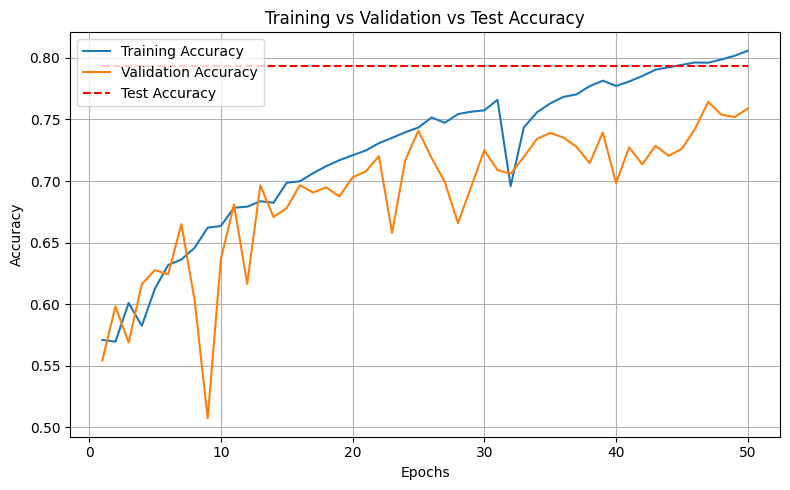

Final Training Accuracy: 0.8058
Final Validation Accuracy: 0.7588
Test Accuracy: 0.7935


In [364]:
# Training
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=64, validation_split=0.2)

# Test evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Plot
test_loss, test_accuracy = model.evaluate(x_test, y_test)
evaluate_and_plot(model, history, x_test, y_test)



## model 1 - orginal data 

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8185 - loss: 0.4040 - val_accuracy: 0.8905 - val_loss: 0.2884
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8370 - loss: 0.3732 - val_accuracy: 0.4710 - val_loss: 1.2067
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8322 - loss: 0.3763 - val_accuracy: 0.5545 - val_loss: 0.7844
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8344 - loss: 0.3713 - val_accuracy: 0.6855 - val_loss: 0.5445
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8418 - loss: 0.3586 - val_accuracy: 0.5605 - val_loss: 0.7957
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8364 - loss: 0.3770 - val_accuracy: 0.5180 - val_loss: 0.9184
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8309 - loss: 0.3722 - val_accuracy: 0.6545 - val_loss: 0.6617
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8355 - loss: 0.3639 - val_accu

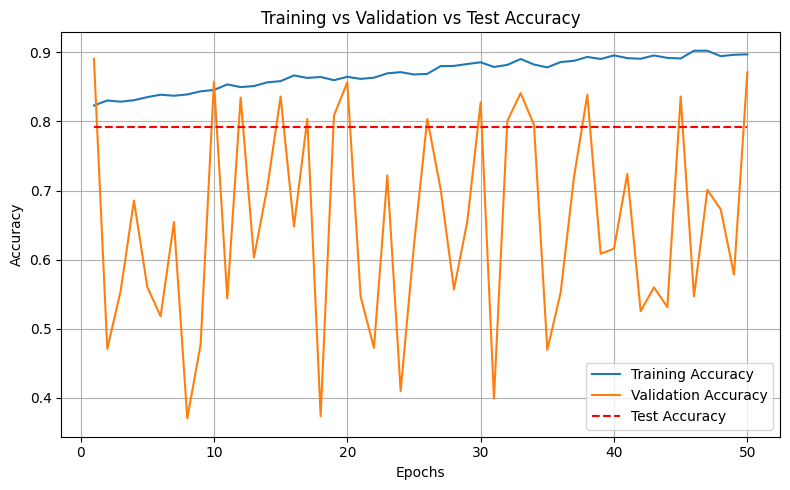

Final Training Accuracy: 0.8970
Final Validation Accuracy: 0.8710
Test Accuracy: 0.7925


In [365]:

# Training
history = model.fit(x_train_original, y_train_original, epochs=EPOCHS, batch_size=64, validation_split=0.2)

# Test evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)

# Plot
test_loss, test_accuracy = model.evaluate(x_test, y_test)
evaluate_and_plot(model, history, x_test, y_test)



## Model 2 - learing rate = 0.001

In [366]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Initialize the model
model2 = Sequential()

# 1st Conv Layer: 32 filters, (3,3), ReLU, MaxPooling, BatchNorm, Dropout
model2.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))

# 2nd Conv Layer: 64 filters, (3,3), ReLU, MaxPooling, BatchNorm, Dropout
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

# Fully Connected Layer: 100 units, ReLU, BatchNorm, Dropout
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# Output Layer: 1 unit, Sigmoid
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print summary
model2.summary()

Model: "sequential_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_92 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_138         │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_138 (Dropout)           │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_93 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_139         │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_139 (Dropout)           │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_46 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_140         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_140 (Dropout)           │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,777 (979.60 KB)

 Trainable params: 250,385 (978.07 KB)

 Non-trainable params: 392 (1.53 KB)

## Model 2 - Augmented data

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5736 - loss: 0.8396 - val_accuracy: 0.6605 - val_loss: 0.6299
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6646 - loss: 0.6180 - val_accuracy: 0.6637 - val_loss: 0.6194
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6968 - loss: 0.5749 - val_accuracy: 0.6345 - val_loss: 0.7053
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7170 - loss: 0.5473 - val_accuracy: 0.6760 - val_loss: 0.5950
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7390 - loss: 0.5246 - val_accuracy: 0.6322 - val_loss: 0.6520
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7539 - loss: 0.4972 - val_accuracy: 0.7345 - val_loss: 0.5304
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7680 - loss: 0.4815 - val_accuracy: 0.7413 - val_loss: 0.5205
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7783 - loss: 0.4584 - val_accu

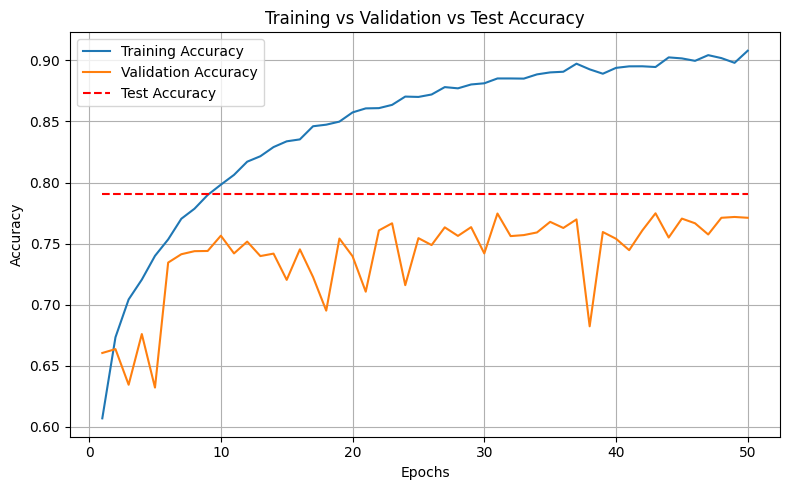

Final Training Accuracy: 0.9079
Final Validation Accuracy: 0.7712
Test Accuracy: 0.7910


In [367]:
# Training
history = model2.fit(x_train, y_train, epochs=EPOCHS, batch_size=64, validation_split=0.2)

# Test evaluation
test_loss, test_accuracy = model2.evaluate(x_test, y_test)

# Plot
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
evaluate_and_plot(model2, history, x_test, y_test)

## Model 2 - Original data

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8871 - loss: 0.3007 - val_accuracy: 0.6375 - val_loss: 0.8176
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8975 - loss: 0.2530 - val_accuracy: 0.8635 - val_loss: 0.3478
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9088 - loss: 0.2359 - val_accuracy: 0.7465 - val_loss: 0.5432
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9147 - loss: 0.2146 - val_accuracy: 0.8660 - val_loss: 0.3283
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9208 - loss: 0.2054 - val_accuracy: 0.8955 - val_loss: 0.2845
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9129 - loss: 0.2091 - val_accuracy: 0.9130 - val_loss: 0.2402
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9176 - loss: 0.1993 - val_accuracy: 0.8255 - val_loss: 0.3940
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9236 - loss: 0.1891 - val_accu

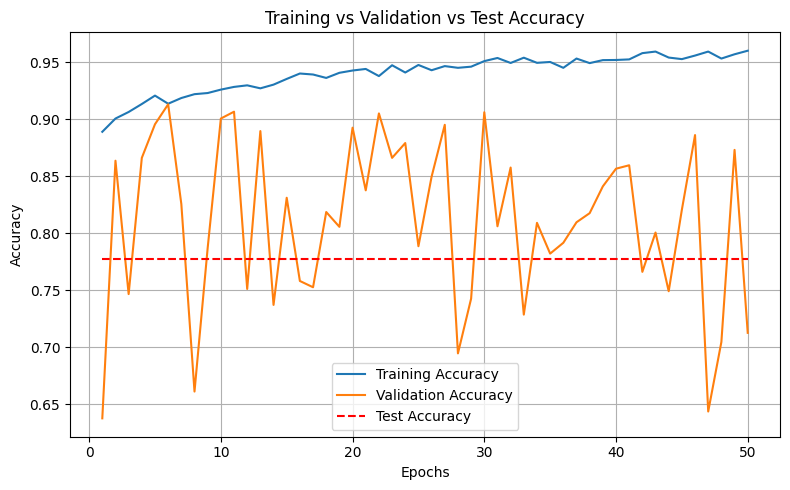

Final Training Accuracy: 0.9600
Final Validation Accuracy: 0.7125
Test Accuracy: 0.7775


In [368]:

# Training
history = model2.fit(x_train_original, y_train_original, epochs=EPOCHS, batch_size=64, validation_split=0.2)

# Test evaluation
test_loss, test_accuracy = model2.evaluate(x_test, y_test)

# Plot
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
evaluate_and_plot(model2, history, x_test, y_test)

## model 3 learing rate 0.0005

In [369]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam

# Initialize the model
model3 = Sequential()

# 1st Conv Layer: 32 filters, (3,3), ReLU, MaxPooling, BatchNorm, Dropout
model3.add(Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))

# 2nd Conv Layer: 64 filters, (3,3), ReLU, MaxPooling, BatchNorm, Dropout
model3.add(Conv2D(64, (3,3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

# Fully Connected Layer: 100 units, ReLU, BatchNorm, Dropout
model3.add(Flatten())
model3.add(Dense(100, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))

# Output Layer: 1 unit, Sigmoid
model3.add(Dense(1, activation='sigmoid'))

# Compile model
model3.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print summary
model3.summary()

Model: "sequential_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_94 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_141         │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_141 (Dropout)           │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_142         │ (None, 6, 6, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_142 (Dropout)           │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_47 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 100)            │       230,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_143         │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_143 (Dropout)           │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,777 (979.60 KB)

 Trainable params: 250,385 (978.07 KB)

 Non-trainable params: 392 (1.53 KB)

## model 3 augmented data

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5764 - loss: 0.8678 - val_accuracy: 0.6225 - val_loss: 0.6578
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6372 - loss: 0.6721 - val_accuracy: 0.6798 - val_loss: 0.5931
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.6759 - loss: 0.6067 - val_accuracy: 0.6918 - val_loss: 0.5770
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7037 - loss: 0.5720 - val_accuracy: 0.7055 - val_loss: 0.5688
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7319 - loss: 0.5351 - val_accuracy: 0.6978 - val_loss: 0.5781
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.7357 - loss: 0.5239 - val_accuracy: 0.6528 - val_loss: 0.6203
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7501 - loss: 0.4992 - val_accuracy: 0.7307 - val_loss: 0.5278
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.7537 - loss: 0.4912 - val_accu

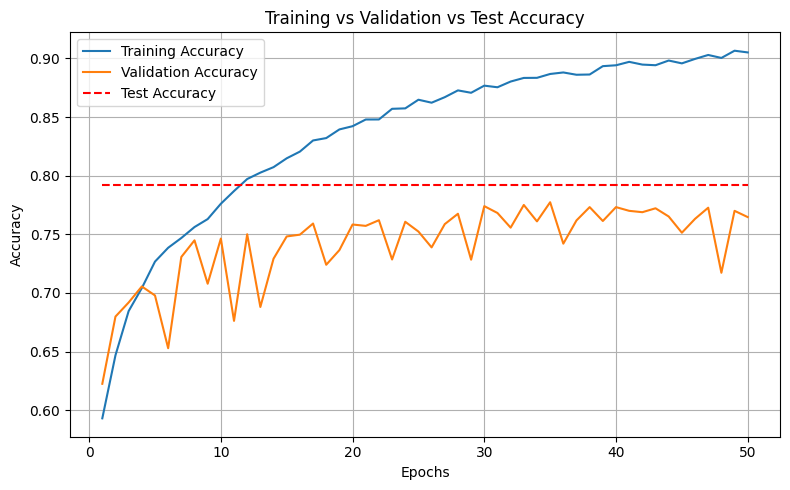

Final Training Accuracy: 0.9051
Final Validation Accuracy: 0.7647
Test Accuracy: 0.7920


In [370]:
# Training
history = model3.fit(x_train, y_train, epochs=EPOCHS, batch_size=64, validation_split=0.2)

# Test evaluation
test_loss, test_accuracy = model3.evaluate(x_test, y_test)

# Plot
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
evaluate_and_plot(model3, history, x_test, y_test)

## MOdel 3 original data

Epoch 1/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8768 - loss: 0.3195 - val_accuracy: 0.8245 - val_loss: 0.3850
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9025 - loss: 0.2619 - val_accuracy: 0.8640 - val_loss: 0.3403
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9072 - loss: 0.2435 - val_accuracy: 0.6745 - val_loss: 0.7748
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9046 - loss: 0.2298 - val_accuracy: 0.8655 - val_loss: 0.3114
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9059 - loss: 0.2300 - val_accuracy: 0.8890 - val_loss: 0.2806
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9149 - loss: 0.2088 - val_accuracy: 0.8915 - val_loss: 0.2773
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9198 - loss: 0.1977 - val_accuracy: 0.8910 - val_loss: 0.2856
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9229 - loss: 0.1867 - val_accu

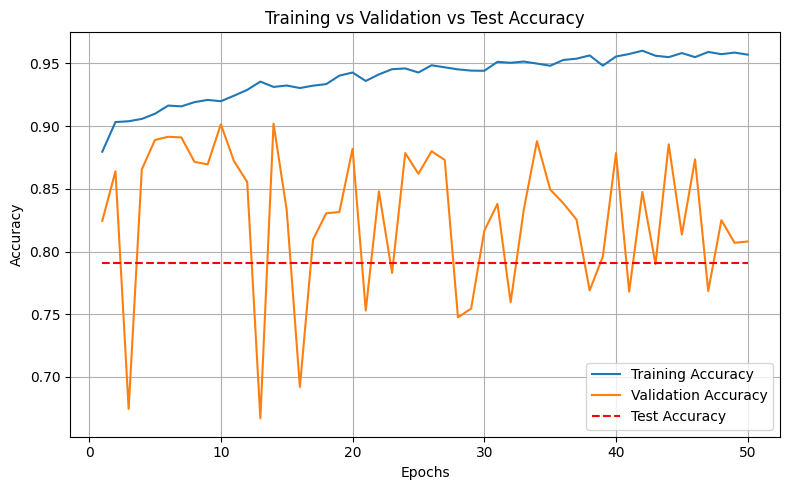

Final Training Accuracy: 0.9570
Final Validation Accuracy: 0.8080
Test Accuracy: 0.7910


In [371]:
# Training
history = model3.fit(x_train_original, y_train_original, epochs=EPOCHS, batch_size=64, validation_split=0.2)

# Test evaluation
test_loss, test_accuracy = model3.evaluate(x_test, y_test)

# Plot
test_loss, test_accuracy = model3.evaluate(x_test, y_test)
evaluate_and_plot(model3, history, x_test, y_test)